In [ ]:
import tensorflow as tf
tf.__version__

'2.17.1'

## Working with fashion_mnist_data

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("TRAINING\n")
print("Training data shape: ",train_data.shape)
print("Training labels shape: ",train_labels.shape)
print("\nTESTING\n")
print("Testing data shape: ",test_data.shape)
print("Testing labels shape: ",test_labels.shape)



TRAINING

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)

TESTING

Testing data shape:  (10000, 28, 28)
Testing labels shape:  (10000,)


### Visualising some images

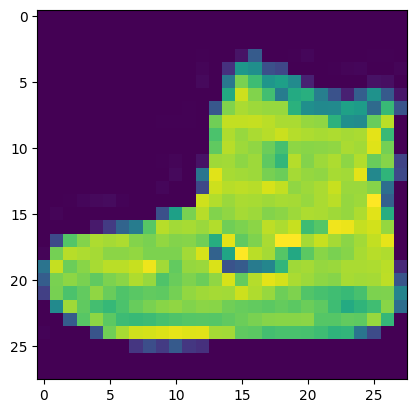

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
plt.show()

## Visualising single image

In [ ]:

print("One image in the data is of shape 32x32 and looks like this:-\n ")
print(train_data[0])
print(train_data[0].shape)

One image in the data is of shape 32x32 and looks like this:-
 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]


In [ ]:
## Visulaising label
print(train_labels[0])

9


## Summarizing the data

### 60,000 training images

### 10,000 testing images

### images of shape 32x32

### label as 0,1,2,3,4... 9


In [ ]:
# From dataset GITHUB page (Its provided with the data)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

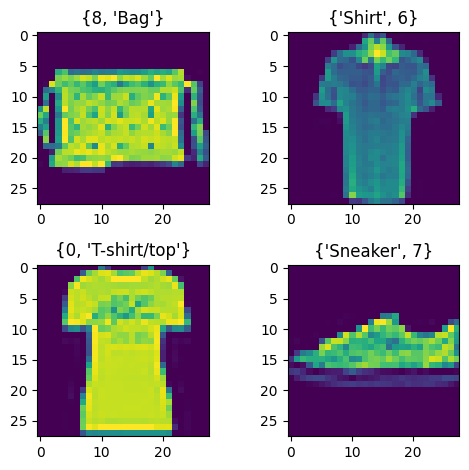

In [ ]:
# visualising 4 random images
import numpy as np
for i in range(4):
  plt.subplot(2,2,i+1)
  img_number =  np.random.choice(range(len(train_data)))
  plt.imshow(train_data[img_number])
  plt.title({class_names[train_labels[img_number]],train_labels[img_number]})
  plt.tight_layout()


#Let's start building model

### Neural Network Configuration

1. **Input Shape**:  
   - The input shape of the neural network will be `(784,)`, as each image is flattened into a 1D vector of 784 pixels (e.g., for a 28x28 grayscale image).

2. **Output Shape**:  
   - The output shape will be `(10,)`, corresponding to the 10 possible labels (classes).

3. **Output Layer Activation**:  
   - The activation function for the output layer is **Softmax**, which outputs probabilities for each class.  
   - These probabilities will sum up to **1**, making it easy to interpret the predicted label.

4. **Loss Function**:  
   - The loss function depends on the format of the labels:  
     - **Integer Labels**:  
       Use `tf.keras.losses.SparseCategoricalCrossentropy()`, ideal for class indices in integer form.  
     - **One-Hot Encoded Labels**:  
       Use `tf.keras.losses.CategoricalCrossentropy()`, designed for one-hot encoded labels.
5. We'll also use the `validation_data` parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(10 ,activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history  = model.fit(train_data ,
                     train_labels,
                     epochs=10,
                     validation_data = (test_data ,test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1064 - loss: 3.2511 - val_accuracy: 0.1394 - val_loss: 2.2215
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1575 - loss: 2.1440 - val_accuracy: 0.2204 - val_loss: 1.8377
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2540 - loss: 1.7877 - val_accuracy: 0.2699 - val_loss: 1.7974
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2884 - loss: 1.6922 - val_accuracy: 0.2749 - val_loss: 1.6938
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3110 - loss: 1.6336 - val_accuracy: 0.3599 - val_loss: 1.5431
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3547 - loss: 1.5358 - val_accuracy: 0.3654 - val_loss: 1.5015
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3622 - loss: 1.4980 - val_accuracy: 0.3723 - val_loss: 1.4854
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3733 - loss: 1.4761 - 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
##Note that
train_data.min(),train_data.max()


(0, 255)

In [ ]:
### WE need to normalize it
train_data=train_data/255.0
test_data=test_data/255.0

train_data.min(), train_data.max()

# train_data = train_data / 255.0
# test_data = test_data / 255.0

# # Check the min and max values of the training data
# train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
#Now with the normalized data

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(10 ,activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_2.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4699 - loss: 1.4915 - val_accuracy: 0.6726 - val_loss: 0.8988
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7189 - loss: 0.8029 - val_accuracy: 0.7501 - val_loss: 0.7150
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7651 - loss: 0.6796 - val_accuracy: 0.7766 - val_loss: 0.6662
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7839 - loss: 0.6323 - val_accuracy: 0.7839 - val_loss: 0.6412
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7923 - loss: 0.6071 - val_accuracy: 0.7853 - val_loss: 0.6240
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7992 - loss: 0.5883 - val_accuracy: 0.7902 - val_loss: 0.6108
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8037 - loss: 0.5737 - val_accuracy: 0.7930 - val_loss: 0.6016
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8058 - loss: 0.5629 - 

In [ ]:
import pandas as pd

<Axes: title={'center': 'Normalized Data'}>

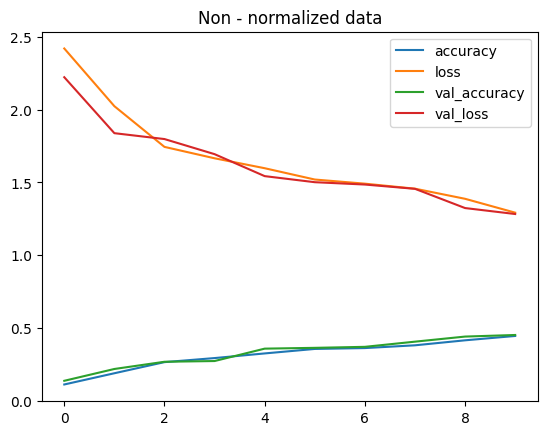

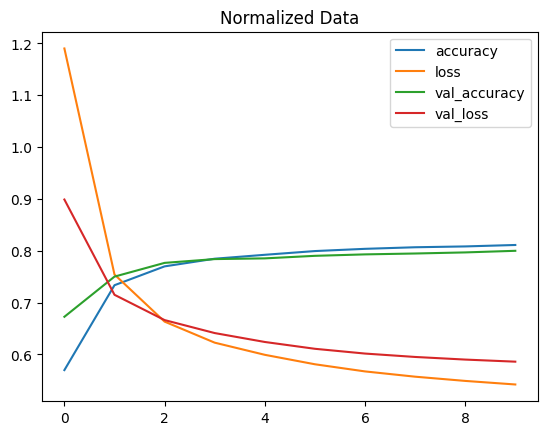

In [ ]:

pd.DataFrame(history.history).plot(title="Non - normalized data")

pd.DataFrame(norm_history.history).plot(title="Normalized Data")


## How about finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


def lr_schedule(epochs):
  return 1e-3*(10**(epochs/20))

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4430 - loss: 1.5623 - val_accuracy: 0.7533 - val_loss: 0.8235 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7603 - loss: 0.7671 - val_accuracy: 0.7720 - val_loss: 0.6853 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7775 - loss: 0.6570 - val_accuracy: 0.7819 - val_loss: 0.6404 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7867 - loss: 0.6138 - val_accuracy: 0.7897 - val_loss: 0.6132 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7925 - loss: 0.5907 - val_accuracy: 0.7938 - val_loss: 0.5989 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7965 - loss: 0.5760 - val_accuracy: 0.7963 - val_loss: 0.5871 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7998 - l

Text(0.5, 1.0, 'Finding the idead Learning Rate')

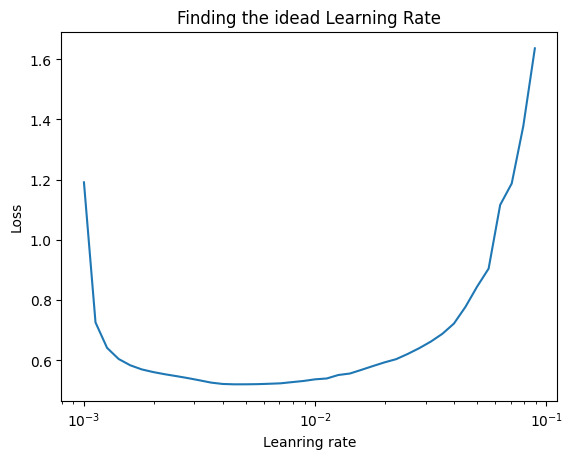

In [ ]:
import numpy as np

lrs= find_lr_history.history["learning_rate"]
loss = find_lr_history.history["loss"]

plt.semilogx(lrs ,loss)
plt.xlabel("Leanring rate")
plt.ylabel("Loss")
plt.title("Finding the idead Learning Rate")

In [ ]:
# Loss decreases continously near to 0.001 which is the learning rate we will choose

## Redifing our model with the found lr

In [ ]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #same as default Adam
                 metrics=["accuracy"])



history = model_4.fit(train_data,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4762 - loss: 1.3283 - val_accuracy: 0.7520 - val_loss: 0.7152
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7604 - loss: 0.6741 - val_accuracy: 0.7884 - val_loss: 0.6143
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7928 - loss: 0.5960 - val_accuracy: 0.8016 - val_loss: 0.5785
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8062 - loss: 0.5628 - val_accuracy: 0.8077 - val_loss: 0.5587
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8135 - loss: 0.5427 - val_accuracy: 0.8137 - val_loss: 0.5458
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8189 - loss: 0.5290 - val_accuracy: 0.8163 - val_loss: 0.5374
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8232 - loss: 0.5192 - val_accuracy: 0.8188 - val_loss: 0.5315
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8255 - loss: 0.5113 - 

# TRAINING DONE

## Now what else can we do
1. Evaluate its performance using other classification metrics
2. Assess some of its properties (through visualisation)
3. Improve its accuracy (by training for longer or change its architecture)
4. Save and export it for use in an application

Lets go through the first two options

In [ ]:
y_probs=model_4.predict(test_data)
print(y_probs.shape)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


(10000,)
Shirt


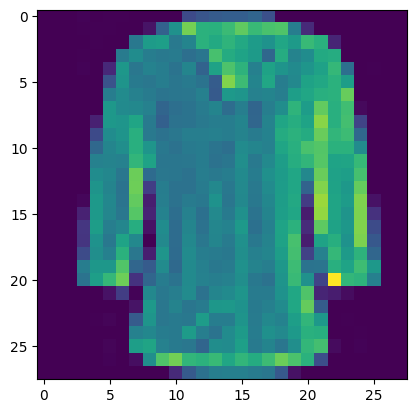

In [ ]:

y_preds=y_probs.argmax(axis=1)
print(y_preds.shape)
# print("Prdiction on the 4th image")
plt.imshow(test_data[4])
print(class_names[y_preds[4]])


In [ ]:
print(y_preds[:5])

[9 2 1 1 6]


## Creating Confusion Metrics

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_true=test_labels ,y_pred =y_preds )

print()
# conf_matrix_tf = tf.convert_to_tensor(cf_matrix, dtype=tf.float32)
print("Shape of the confusion metrics",cf_matrix.shape)
print(cf_matrix)



Shape of the confusion metrics (10, 10)
[[760   9  26  75   3   2 113   0  12   0]
 [  0 952  11  30   3   0   3   0   1   0]
 [ 14   6 725  13 140   0  99   0   3   0]
 [ 30  25  10 858  35   0  33   0   9   0]
 [  1   2 127  34 757   0  74   0   5   0]
 [  1   0   0   0   0 921   0  38   4  36]
 [147   4 125  56 125   0 529   0  14   0]
 [  0   0   0   0   0  42   0 937   0  21]
 [  2   1   2  11  12  13  53   4 899   3]
 [  1   0   0   0   0  25   0  51   2 921]]


### Confusion Matrix in Percentage Form is:

In [ ]:
cf_matrix
def cm_in_p(cf_matrix):
  row_sum= tf.reduce_sum(cf_matrix ,axis=1)
  cf_matrix_in_p = (cf_matrix/row_sum)*100;
  return cf_matrix_in_p;

cm_in_p(cf_matrix)

<tf.Tensor: shape=(10, 10), dtype=float64, numpy=
array([[76. ,  0.9,  2.6,  7.5,  0.3,  0.2, 11.3,  0. ,  1.2,  0. ],
       [ 0. , 95.2,  1.1,  3. ,  0.3,  0. ,  0.3,  0. ,  0.1,  0. ],
       [ 1.4,  0.6, 72.5,  1.3, 14. ,  0. ,  9.9,  0. ,  0.3,  0. ],
       [ 3. ,  2.5,  1. , 85.8,  3.5,  0. ,  3.3,  0. ,  0.9,  0. ],
       [ 0.1,  0.2, 12.7,  3.4, 75.7,  0. ,  7.4,  0. ,  0.5,  0. ],
       [ 0.1,  0. ,  0. ,  0. ,  0. , 92.1,  0. ,  3.8,  0.4,  3.6],
       [14.7,  0.4, 12.5,  5.6, 12.5,  0. , 52.9,  0. ,  1.4,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  4.2,  0. , 93.7,  0. ,  2.1],
       [ 0.2,  0.1,  0.2,  1.1,  1.2,  1.3,  5.3,  0.4, 89.9,  0.3],
       [ 0.1,  0. ,  0. ,  0. ,  0. ,  2.5,  0. ,  5.1,  0.2, 92.1]])>

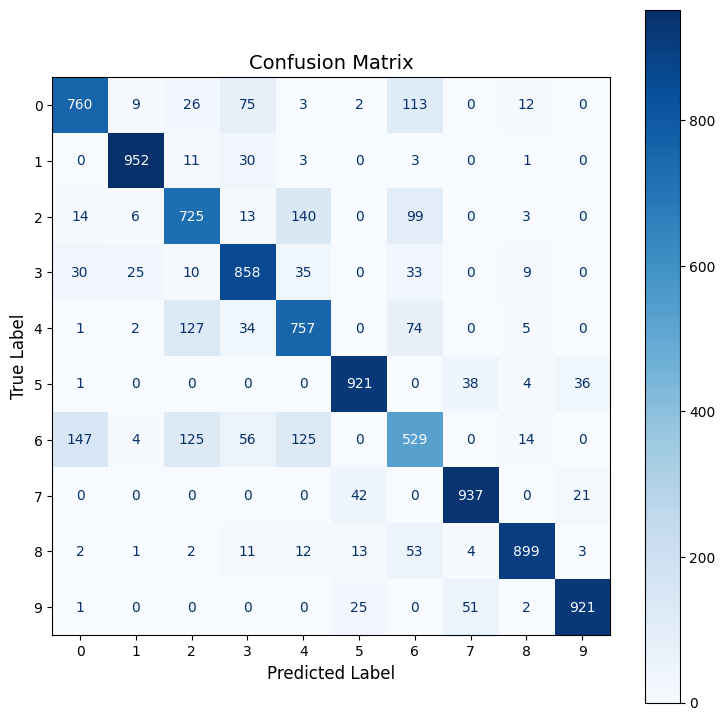

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

cf_matrix_in_percentage= cm_in_p(cf_matrix)
cf_matrix_in_percentage

# Display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cf_matrix,
    display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
)

# Plot with a blue color map (light to dark blue)
fig, ax = plt.subplots(figsize=(9, 9))
cm_display.plot(cmap=plt.cm.Blues, ax=ax)

plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

plt.show()


### Creating a cf with number and percenatge in each block

## How
Since we are using sklearn to create the confusiuon metrics ,it only takes matrix with numberical values .
so
1. Create a simple graph using sklearn and cf_matrix like we already did
2. Now add the percenatge value to each of the block

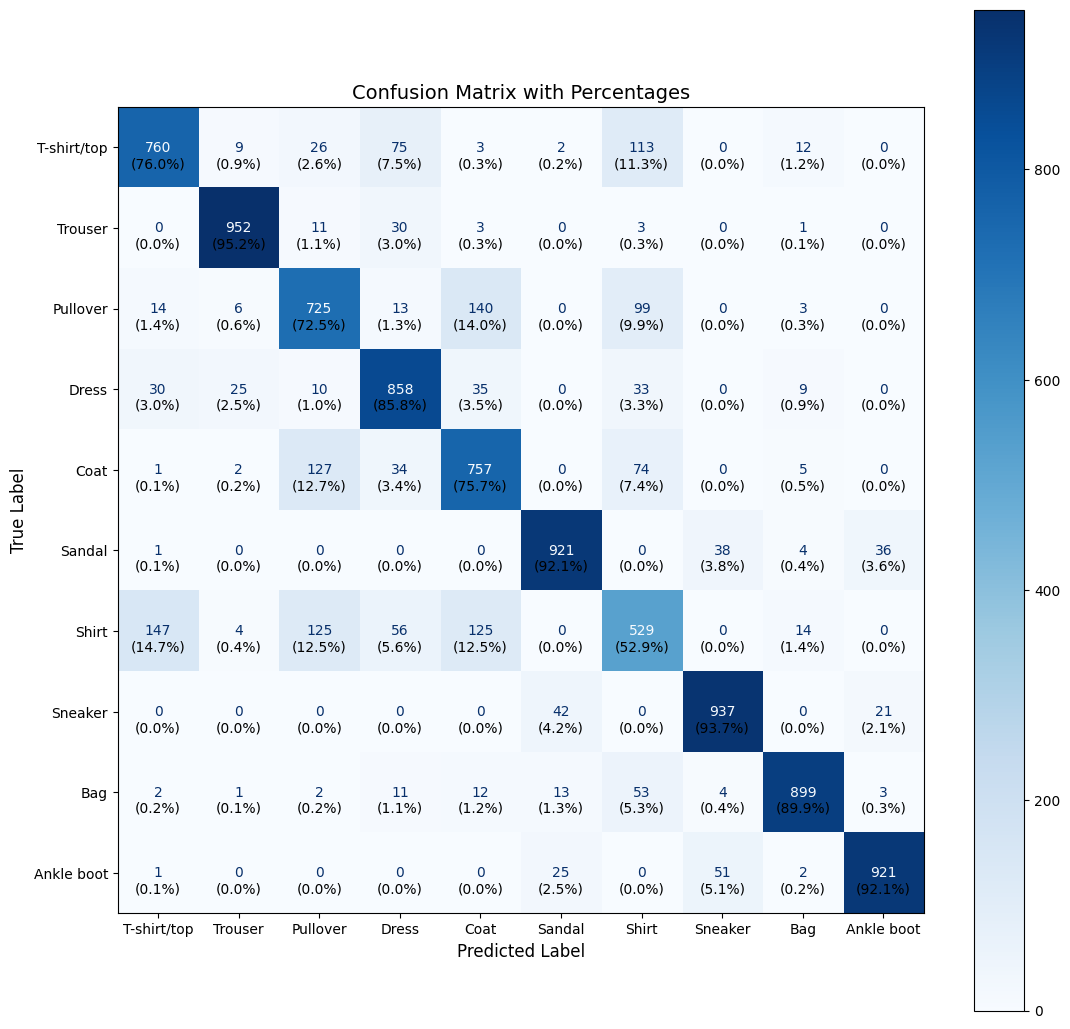

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Display the confusion matrix
fig, ax = plt.subplots(figsize=(13, 13))

# Use ConfusionMatrixDisplay to render the matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=class_names)
cm_display.plot(cmap=plt.cm.Blues, ax=ax, colorbar=True)

# Add custom annotations for both absolute and percentage values
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        percentage_value = cf_matrix_in_percentage[i, j]
        plt.text(
            j, i, f"\n\n({percentage_value:.1f}%)",
            ha="center", va="center", color="black"
        )

# Customize title and labels
plt.title("Confusion Matrix with Percentages", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

plt.show()


TypeError: 'ConfusionMatrixDisplay' object is not subscriptable

## predicting on some random image



In [ ]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def make_prediction_on_random_im():
  img_idx = np.random.randint(0, 10000)
  test_image = test_data[img_idx]
  plt.imshow(test_image)

  true_label = test_labels[img_idx]

  predictions = model_4.predict(test_image.reshape(1, 28, 28))
  predicted_label = predictions.argmax(axis=1)
  probability = round(tf.reduce_max(predictions).numpy(),2)

  plt.xlabel(f"ACTUAL: {class_names[true_label]}\n PREDICTED:{class_names[predicted_label[0]]} with probability of {probability}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


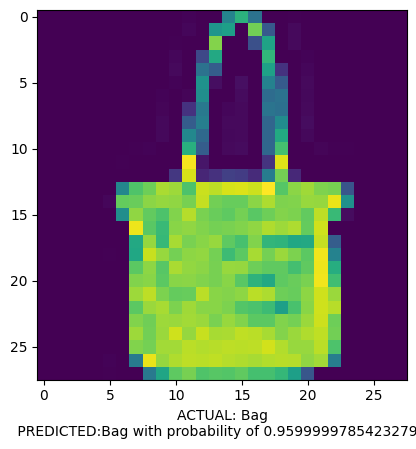

In [ ]:
make_prediction_on_random_im()

In [2]:
# import tensorflow as tf
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"priyamraj67","key":"a715bd4b88b56dc9b81741cc1423357a"}'}